In [87]:
import pandas as pd
import networkx as nx
import random as rd
import matplotlib.pyplot as plt

side_path = '公交线路.csv'
dot_path = '公交站点.csv'
#请用公交数据处理.py处理过的数据进行使用
#只要格式与范例数据一样也可使用

In [88]:
side1 = pd.read_csv(side_path, encoding='gbk')
dot1 = pd.read_csv(dot_path, encoding='gbk')
side_b = pd.DataFrame(side1)
dot2 = pd.DataFrame(dot1)
side_b

,source,target,Weight
0,1号学生食堂,云艺公共教学楼,1
1,6号路,凤庆路口(双羊街),1
2,6号路,天文台(金马路),2
3,6号路,金马路中段,1
4,920医院,东陆桥(西园路),1
...,...,...,...
4082,龙马村(珥季路),龙马村东(珥季路),1
4083,龙马村东(珥季路),中航城(珥季路),1
4084,龙马村东(珥季路),龙马村(珥季路),1
4085,龙马社区居委会,中营(云秀路),4


In [89]:

dot = list(dot2.iloc[:, 0])

In [90]:
def degree_averge(G):
    degree = nx.degree_histogram(G)
    i = 0
    i1 = 0
    i2 = 0
    for s in degree:
        i1 += i * s
        i += 1
        i2 += s
    f = i1 / i2
    return f



In [91]:
def attack(dot, side_b):
    G1 = nx.Graph()

    nodes = []
    for i in dot:
        a = rd.random()
        if p <= a:
            G1.add_node(i)

            nodes.append(i)
        else:
            side_b = side_b[~side_b['source'].isin([i])]
            side_b = side_b[~side_b['target'].isin([i])]
    side_q = list(side_b.iloc[:, 0])
    side_z = list(side_b.iloc[:, 1])
    for i in range(0, len(side_z) - 1):
        G1.add_edge(side_q[i], side_z[i])
    return [G1, nodes]

In [92]:
a = []
for i in range(0, 100):
    p = i * 0.01
    G = attack(dot, side_b)[0]
    nodes = attack(dot, side_b)[1]
    a.append(nx.global_efficiency(G))




In [93]:
p = 0
G = attack(dot, side_b)[0]
datas = pd.DataFrame(G.degree())
datas = datas.sort_values(by=1, ascending=False)
d = datas.shape[0]
c=[]
for i in range(0, 100):
    b =int(i/100*d)
    data1 = datas.iloc[0:b, 0]
    G.remove_nodes_from(data1)
    c.append(nx.global_efficiency(G))
c

[0.11602718030964292,
 0.0779806814515455,
 0.06700586784534585,
 0.05823925975258292,
 0.0526174462990614,
 0.04233163261241719,
 0.03773029988731609,
 0.029687438779495666,
 0.024189960378981898,
 0.021673593966088135,
 0.015639910642213987,
 0.008853299157924469,
 0.00753839059605133,
 0.006861646247093002,
 0.005235437910261361,
 0.004322770881948428,
 0.0038698865096302585,
 0.0036285705217247847,
 0.003374448770388067,
 0.0032953801904310356,
 0.002867586005469601,
 0.002677970888744264,
 0.002388073000614494,
 0.0022526039069081633,
 0.00208823462591464,
 0.0020417916127483393,
 0.0019783368420597507,
 0.001807023998759069,
 0.001631135629773729,
 0.0015079338065439908,
 0.0014864301710081772,
 0.0014489859252695997,
 0.001448793432073429,
 0.0014201461652399907,
 0.0013658414397343947,
 0.0013467074209358477,
 0.001354982278107344,
 0.0013535494730784327,
 0.0013517865718254837,
 0.0013319624789587844,
 0.0013016691189346495,
 0.0012828205457307848,
 0.001270190217848038,
 0.00

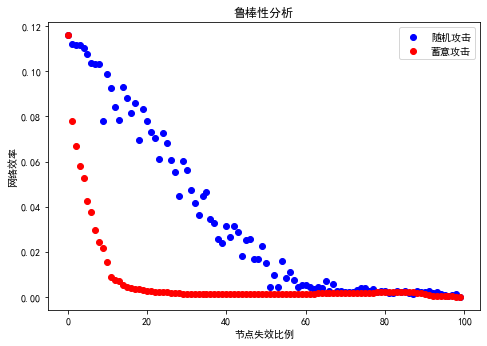

In [94]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
grades_range = range(0, 100, 1)
plt.rcParams["font.sans-serif"] = ["SimHei"]  #设置字体
plt.rcParams["axes.unicode_minus"] = False  #正常显示负号
ax.scatter(grades_range, a, color='b', label="随机攻击")
ax.scatter(grades_range, c, color='r', label="蓄意攻击")
ax.set_xlabel('节点失效比例')
ax.set_ylabel('网络效率')
ax.set_title('鲁棒性分析')
#添加图例
plt.legend()
plt.show()